# XSS Vulnerability Prediction


# Section 1 - Dataset 1

## Preprocessing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/XSS_Dataset.csv")

In [ ]:
df.shape

(43218, 66)

In [ ]:
for column_name in df.columns:
    print(column_name)

Contains &lt
ScripTag
Readable
Contains "><
Contains '><
Contains And
Contains Percentage
Contains Slash
Contains BackSlash
Contains Plus
Contains Document
Contains Window
Contains Onload
Contains Onerror
Contains DIV
Contains iframe
Contains img
Contains SRC
Containss Var
Contains Eval
Contains href
Contains Cookie
Contains StringfromCharCode
Contains Single Quote
Contains Question Mark
Contains Exclamation Mark
Contains Semicolon
Contains HTTP
Contains JS
Contains Hash
Contains Equal
Contains Open Bracket
Contains Close Bracket
Contains Duble Bracket
Contains Dollar
Contains Open Parenthesis
Contains Close Parenthesis
Contains Asterisk
Contains Comma
Contains Hyphen
Contains Less Than
Contains Greater Than
Contains At
Contains Underscore
Contains location
Contains Search
Contains &#
Contains Colon
Contains Dots
Contains Open Brace
Contains Close Brace
Contains tilde
Contains Spase
Contains Qutions
Contains Grave
Contains Duble Equals
Contains Duble Slash
Contains Vertical Bar
Contain

In [ ]:
df.isnull().values.any()

False

In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns
non_numerical_cols = df.columns[~df.columns.isin(numerical_cols)]
print(non_numerical_cols)

Index(['Class'], dtype='object')


In [ ]:
df[df.columns[-1]] = df[df.columns[-1]].replace({'Malicious': 1, 'Benign': 0})

<ipython-input-94-20576bc7bd06>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[df.columns[-1]] = df[df.columns[-1]].replace({'Malicious': 1, 'Benign': 0})


In [ ]:
min_values = df.min()
max_values = df.max()

print("Min Values:")
print(min_values)
print("Max Values:")
print(max_values)

Min Values:
Contains &lt           0.0
ScripTag               0.0
Readable               0.0
Contains "><           0.0
Contains '><           0.0
                      ... 
Contains Break Line    0.0
Letters Ratio          0.0
Numbuers Ratio         0.0
Symbols Ratio          0.0
Class                  0.0
Length: 66, dtype: float64
Max Values:
Contains &lt           1.0000
ScripTag               1.0000
Readable               1.0000
Contains "><           1.0000
Contains '><           1.0000
                        ...  
Contains Break Line    1.0000
Letters Ratio          1.0000
Numbuers Ratio         0.7419
Symbols Ratio          1.0000
Class                  1.0000
Length: 66, dtype: float64


In [ ]:
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows.shape)

Duplicate Rows:
(13797, 66)


Duplicate Rows:
(13797, 66)


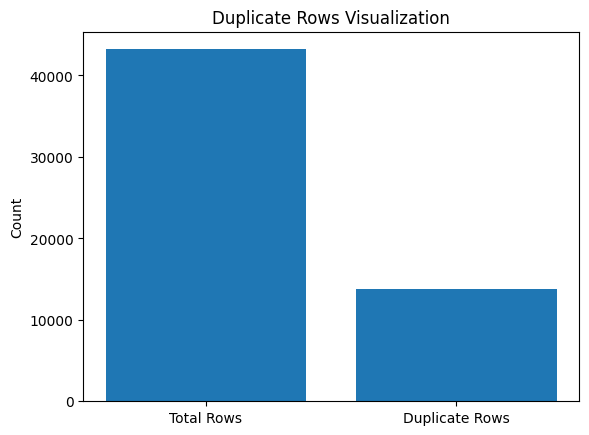

In [ ]:
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows.shape)

total_rows = df.shape[0]
duplicate_count = duplicate_rows.shape[0]

plt.bar(['Total Rows', 'Duplicate Rows'], [total_rows, duplicate_count])
plt.title('Duplicate Rows Visualization')
plt.ylabel('Count')
plt.show()

In [ ]:
df = df.drop_duplicates()
print("\nDataFrame without duplicates:")
print(df.shape)


DataFrame without duplicates:
(29421, 66)


In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Remove constant features
selector = VarianceThreshold(threshold=0)
selector.fit(df)
keep_indices = selector.get_support(indices=True)
keep_columns = df.columns[keep_indices]
df_no_constant = df[keep_columns]

# Define a threshold for quasi-constant features (e.g., 95%)
quasi_constant_threshold = 0.95

# Calculate the percentage of the most frequent value for each feature
n_samples = df.shape[0]
quasi_constant_features = [
    feature
    for feature in df_no_constant.columns
    if (df_no_constant[feature].value_counts(normalize=True).values[0] >= quasi_constant_threshold)
]

# Remove quasi-constant features
df = df_no_constant.drop(columns=quasi_constant_features)

print("Selected features:", df.shape)

Selected features: (29421, 41)


In [ ]:
value_counts = df[df.columns[-1]].value_counts()

print(value_counts)

Class
0    16314
1    13107
Name: count, dtype: int64


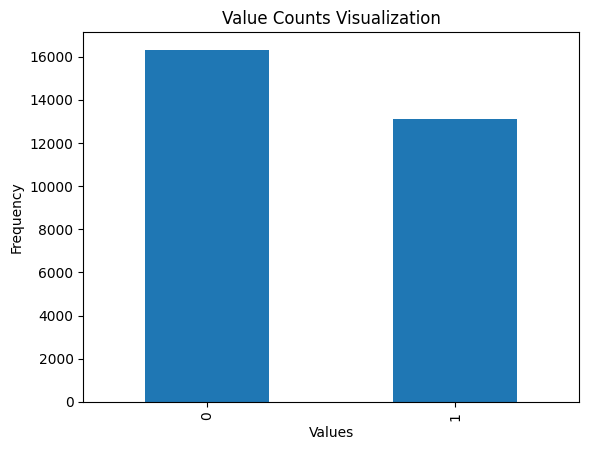

In [ ]:
value_counts.plot(kind='bar')
plt.title('Value Counts Visualization')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.to_csv('jyo_xss_dataset.csv', index=False)

## Training


In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
X = df.drop(df.columns[-1], axis=1)
y = df[df.columns[-1]]
y = y.astype(int)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (17652, 40)
X_val shape: (5884, 40)
X_test shape: (5885, 40)
y_train shape: (17652,)
y_val shape: (5884,)
y_test shape: (5885,)


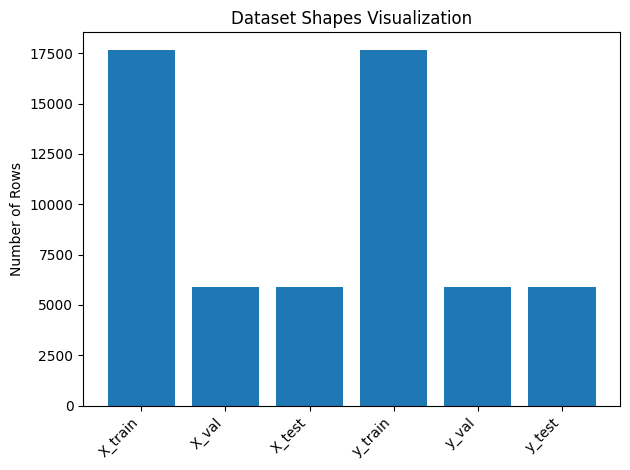

In [ ]:
import numpy as np

shapes = {
    "X_train": X_train.shape,
    "X_val": X_val.shape,
    "X_test": X_test.shape,
    "y_train": y_train.shape,
    "y_val": y_val.shape,
    "y_test": y_test.shape,
}

labels = list(shapes.keys())
values = [shape[0] for shape in shapes.values()]
# Create a bar chart
plt.bar(labels, values)
plt.title('Dataset Shapes Visualization')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
value_counts = y_val.value_counts()
print(value_counts)

Class
0    3289
1    2595
Name: count, dtype: int64


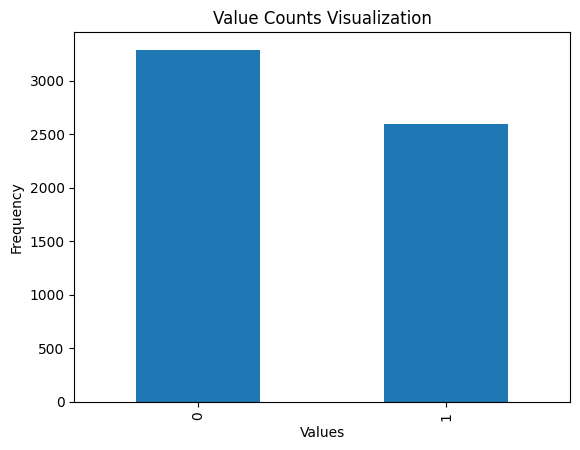

In [ ]:
value_counts.plot(kind='bar')
plt.title('Value Counts Visualization')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [ ]:
print(np.unique(y))

[0 1]


In [ ]:
classifier_linear = SVC(kernel='linear')
classifier_linear.fit(X_train, y_train)

y_pred_linear = classifier_linear.predict(X_val)

accuracy_linear = accuracy_score(y_val, y_pred_linear)
precision_linear = precision_score(y_val, y_pred_linear)
recall_linear = recall_score(y_val, y_pred_linear)

print("Accuracy:", accuracy_linear)
print("Precision:", precision_linear)
print("Recall:", recall_linear)

Accuracy: 0.9915023793337865
Precision: 0.9953289217594394
Recall: 0.9853564547206166


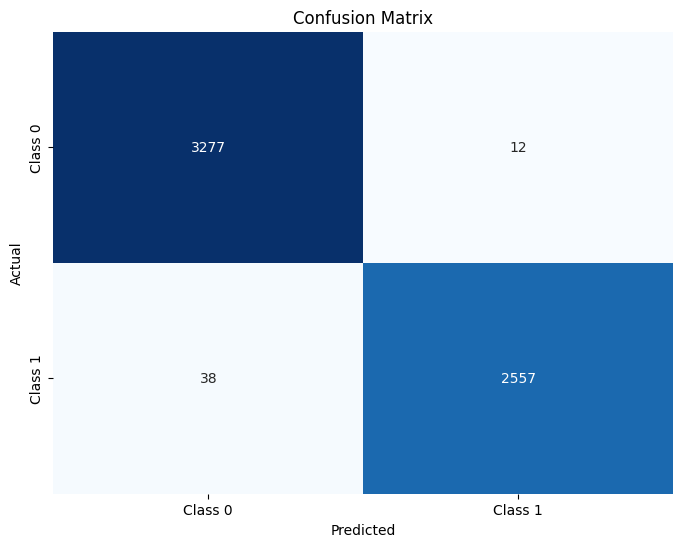

In [ ]:
cm_linear = confusion_matrix(y_val, y_pred_linear)

# Plot using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
classifier_poly = SVC(kernel='poly')
classifier_poly.fit(X_train, y_train)

y_pred_poly = classifier_poly.predict(X_val)

accuracy_poly = accuracy_score(y_val, y_pred_poly)
precision_poly = precision_score(y_val, y_pred_poly)
recall_poly = recall_score(y_val, y_pred_poly)

print("Accuracy:", accuracy_poly)
print("Precision:", precision_poly)
print("Recall:", recall_poly)

Accuracy: 0.9943915703602991
Precision: 0.9957430340557275
Recall: 0.9915221579961464


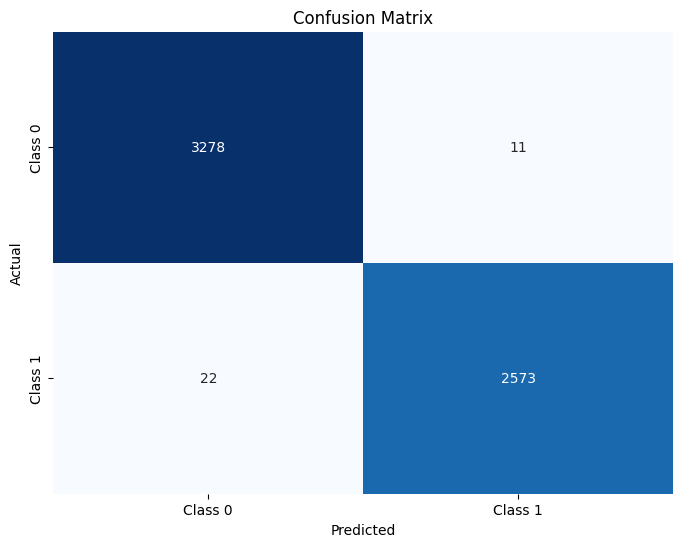

In [ ]:
cm_poly = confusion_matrix(y_val, y_pred_poly)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_poly, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
classifier_rbf = SVC(kernel='rbf')
classifier_rbf.fit(X_train, y_train)

y_pred_rbf = classifier_rbf.predict(X_val)

accuracy_rbf = accuracy_score(y_val, y_pred_rbf)
precision_rbf = precision_score(y_val, y_pred_rbf)
recall_rbf = recall_score(y_val, y_pred_rbf)

print("Accuracy:", accuracy_rbf)
print("Precision:", precision_rbf)
print("Recall:", recall_rbf)

Accuracy: 0.9943915703602991
Precision: 0.9976689976689976
Recall: 0.9895953757225433


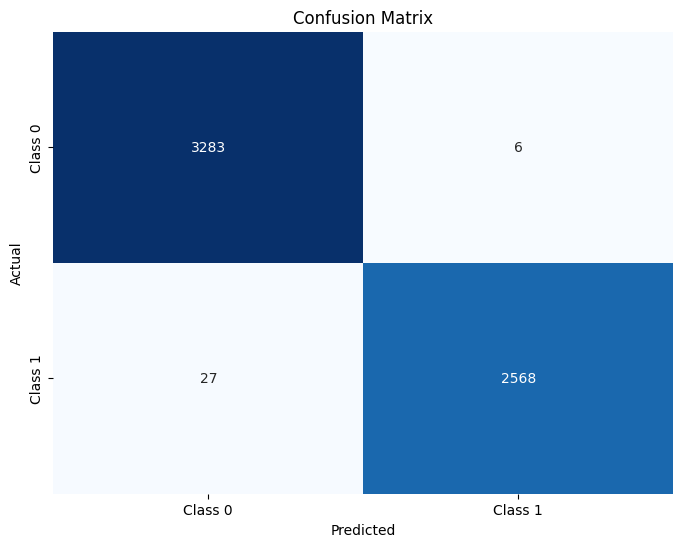

In [ ]:
cm_rbf = confusion_matrix(y_val, y_pred_rbf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rbf, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
classifier_sig = SVC(kernel='sigmoid')
classifier_sig.fit(X_train, y_train)

y_pred_sig = classifier_sig.predict(X_val)

accuracy_sig = accuracy_score(y_val, y_pred_sig)
precision_sig = precision_score(y_val, y_pred_sig)
recall_sig = recall_score(y_val, y_pred_sig)

print("Accuracy:", accuracy_sig)
print("Precision:", precision_sig)
print("Recall:", recall_sig)

Accuracy: 0.8885112168592794
Precision: 0.879155260070395
Recall: 0.8662813102119461


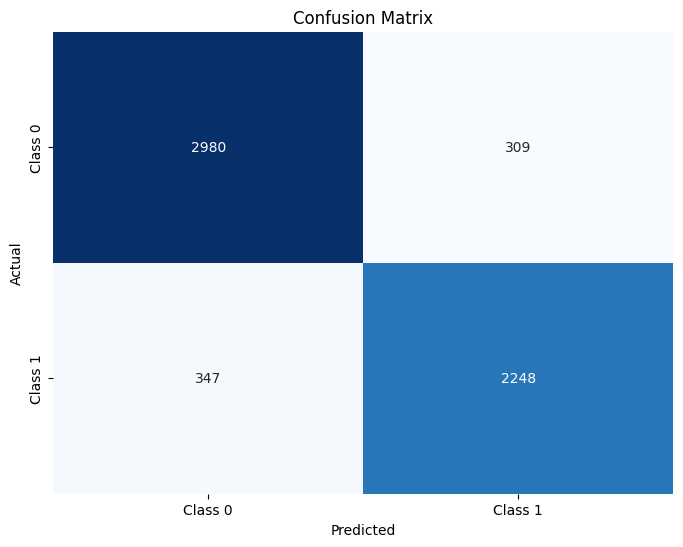

In [ ]:
cm_sig = confusion_matrix(y_val, y_pred_sig)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_sig, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

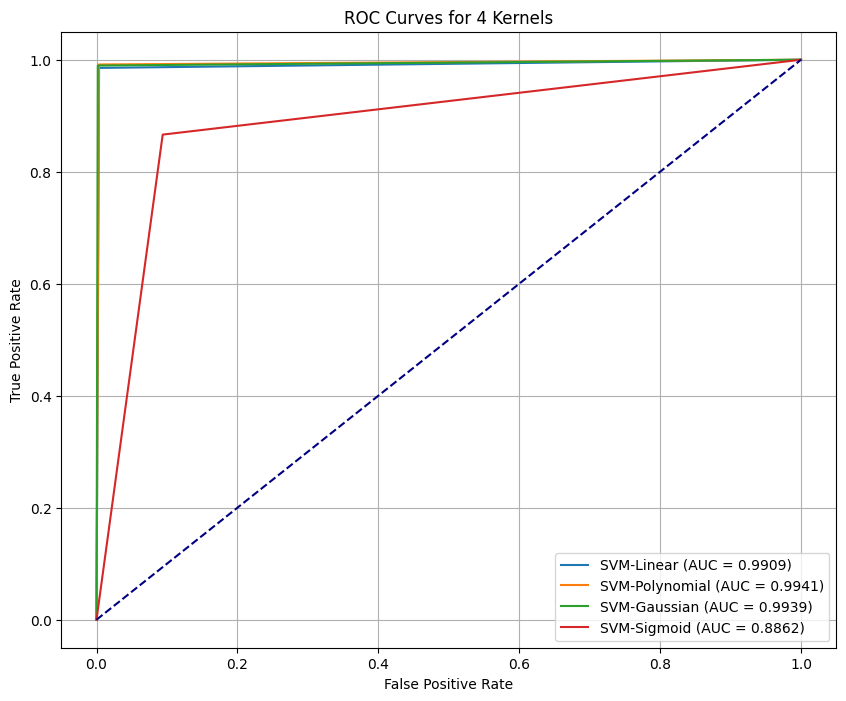

In [ ]:
models = {
    "SVM-Linear": y_pred_linear,
    "SVM-Polynomial": y_pred_poly,
    "SVM-Gaussian": y_pred_rbf,
    "SVM-Sigmoid": y_pred_sig
}

plt.figure(figsize=(10, 8))

for model_name, y_pred in models.items():
    fpr, tpr, _ = roc_curve(y_val, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.4f})")

# Plotting
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for 4 Kernels")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Testing


In [ ]:
y_pred_test = classifier_poly.predict(X_test)

In [ ]:
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
cm_test = confusion_matrix(y_test, y_pred_test)

print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)

Accuracy: 0.9945624468988955
Precision: 0.9950381679389313
Recall: 0.9927646610814927


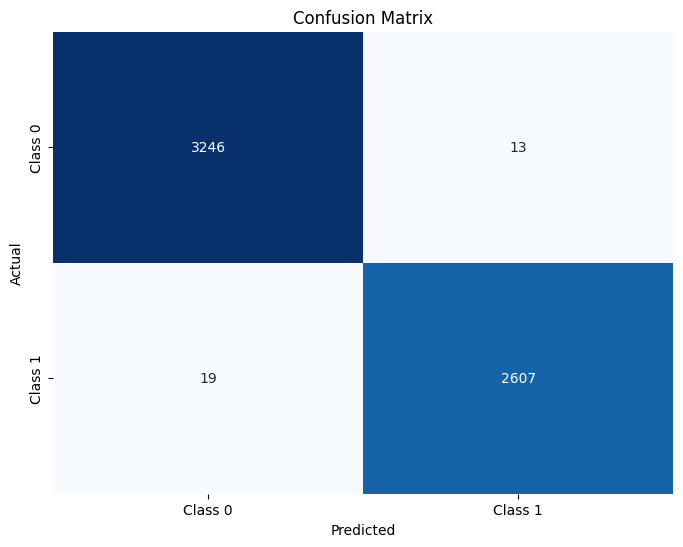

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.9945624468988955
Precision: 0.9950381679389313
Recall: 0.9927646610814927


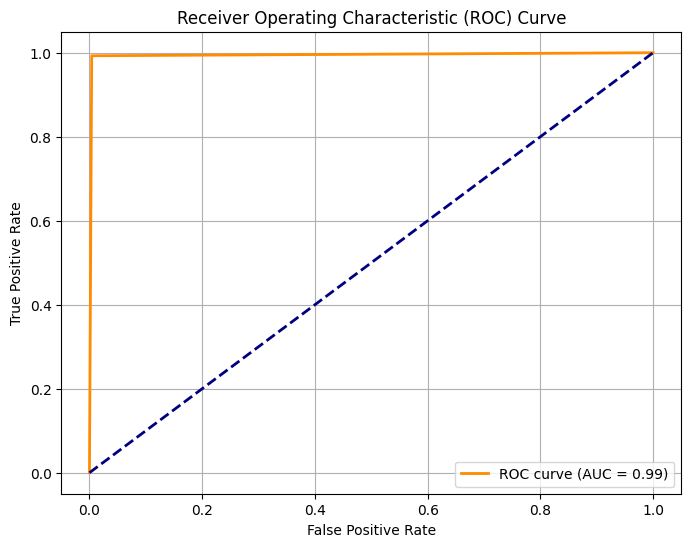

In [ ]:
from sklearn.metrics import roc_curve, auc

# Assuming you have already trained your model and have y_test and y_pred_test

# Print accuracy, precision, and recall
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Section 2 - Dataset 2

## Training

In [ ]:
df = pd.read_csv("/content/normalized_dataset.csv")
# Count null values in each column
# df.isnull().sum()

# # Fill NaN values in the DataFrame itself
# df = df.fillna(0)  # This line is changed

# # Print the results
# print("Number of null values in each column:")
#print(null_counts)
df.isnull().sum()

# # Count total null values in the DataFrame
# total_null_count = null_counts.sum()
# print("\nTotal number of null values:", total_null_count)

,0
url_length,0
url_special_characters,0
url_tag_script,0
url_tag_iframe,0
url_attr_src,0
...,...
js_min_define_function,0
js_min_function_calls,0
js_string_max_length,0
html_length,0


In [ ]:
X = df.drop(df.columns[-1], axis=1)
y = df[df.columns[-1]]
y = y.astype(int)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (83140, 67)
X_val shape: (27713, 67)
X_test shape: (27714, 67)
y_train shape: (83140,)
y_val shape: (27713,)
y_test shape: (27714,)


In [ ]:
value_counts = y_val.value_counts()

print(value_counts)

Label
0    19988
1     7725
Name: count, dtype: int64


Accuracy: 0.9768700609822105
Precision: 0.9877444230239604
Recall: 0.9285436893203883


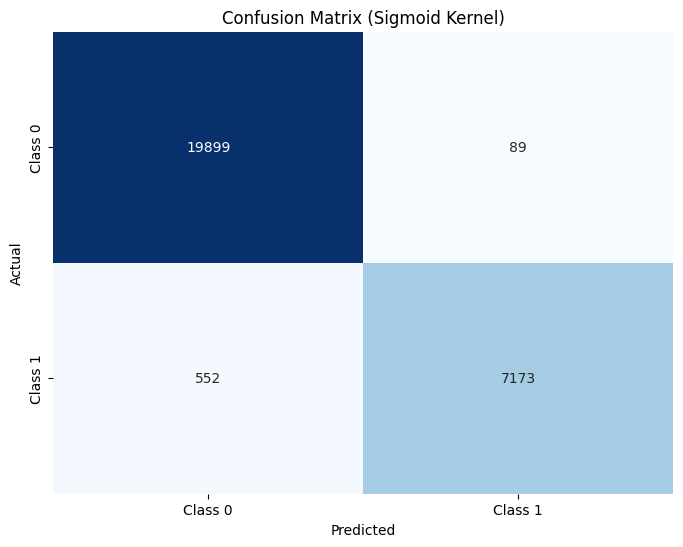

In [ ]:
classifier_linear = SVC(kernel='sigmoid')
classifier_linear.fit(X_train, y_train)

y_pred_linear = classifier_linear.predict(X_val)

accuracy_linear = accuracy_score(y_val, y_pred_linear)
precision_linear = precision_score(y_val, y_pred_linear)
recall_linear = recall_score(y_val, y_pred_linear)

print("Accuracy:", accuracy_linear)
print("Precision:", precision_linear)
print("Recall:", recall_linear)

cm_linear = confusion_matrix(y_val, y_pred_linear)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Sigmoid Kernel)')
plt.show()

Accuracy (Poly): 0.9791433623209325
Precision (Poly): 0.9984656158460036
Recall (Poly): 0.9266019417475728


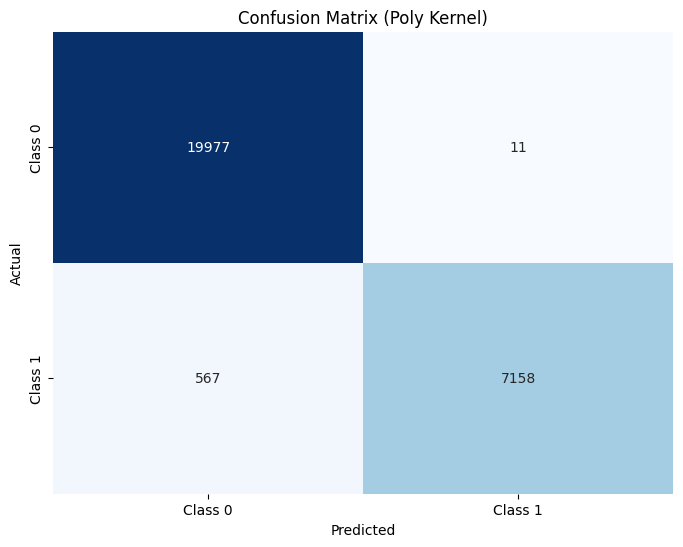

In [ ]:
classifier_poly = SVC(kernel='poly')
classifier_poly.fit(X_train, y_train)

y_pred_poly = classifier_poly.predict(X_val)

accuracy_poly = accuracy_score(y_val, y_pred_poly)
precision_poly = precision_score(y_val, y_pred_poly)
recall_poly = recall_score(y_val, y_pred_poly)

print("Accuracy (Poly):", accuracy_poly)
print("Precision (Poly):", precision_poly)
print("Recall (Poly):", recall_poly)

cm_poly = confusion_matrix(y_val, y_pred_poly)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_poly, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Poly Kernel)')
plt.show()

Accuracy (RBF): 0.9793237830621008
Precision (RBF): 0.9984666852523
Recall (RBF): 0.9272491909385113


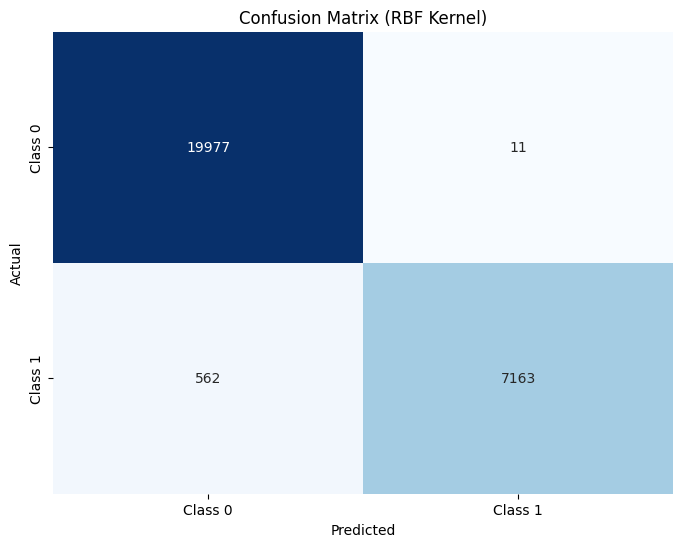

In [ ]:
classifier_rbf = SVC(kernel='sigmoid')
classifier_rbf.fit(X_train, y_train)

y_pred_rbf = classifier_rbf.predict(X_val)

accuracy_rbf = accuracy_score(y_val, y_pred_rbf)
precision_rbf = precision_score(y_val, y_pred_rbf)
recall_rbf = recall_score(y_val, y_pred_rbf)

print("Accuracy (RBF):", accuracy_rbf)
print("Precision (RBF):", precision_rbf)
print("Recall (RBF):", recall_rbf)

cm_rbf = confusion_matrix(y_val, y_pred_rbf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rbf, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (RBF Kernel)')
plt.show()

Accuracy (Sigmoid): 0.9781236235501395
Precision (Sigmoid): 0.9854368932038835
Recall (Sigmoid): 0.9346555693288472


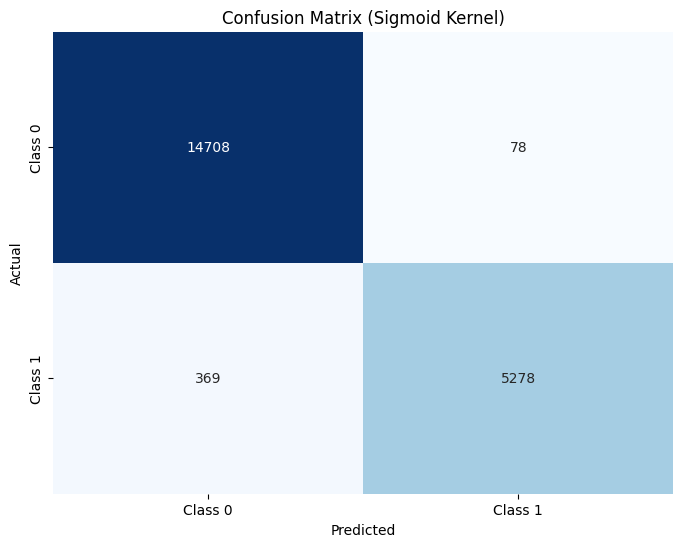

In [ ]:
classifier_sigmoid = SVC(kernel='sigmoid')
classifier_sigmoid.fit(X_train, y_train)

y_pred_sigmoid = classifier_sigmoid.predict(X_val)

accuracy_sigmoid = accuracy_score(y_val, y_pred_sigmoid)
precision_sigmoid = precision_score(y_val, y_pred_sigmoid)
recall_sigmoid = recall_score(y_val, y_pred_sigmoid)

print("Accuracy (Sigmoid):", accuracy_sigmoid)
print("Precision (Sigmoid):", precision_sigmoid)
print("Recall (Sigmoid):", recall_sigmoid)

cm_sigmoid = confusion_matrix(y_val, y_pred_sigmoid)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_sigmoid, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Sigmoid Kernel)')
plt.show()

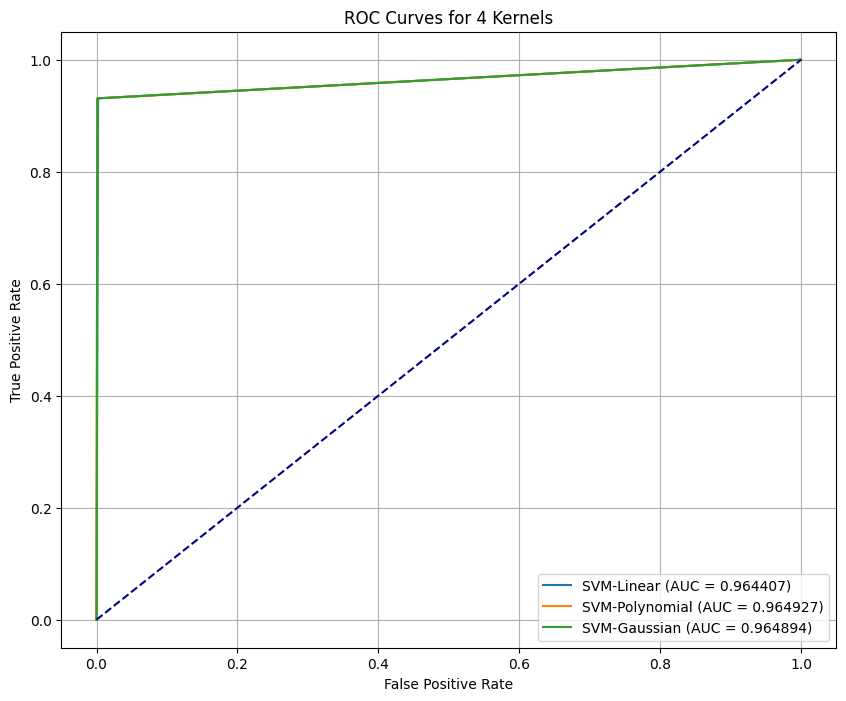

In [ ]:
models = {
    "SVM-Linear": y_pred_linear,
    "SVM-Polynomial": y_pred_poly,
    "SVM-Gaussian": y_pred_rbf,
    # "SVM-Sigmoid": y_pred_sig
}

plt.figure(figsize=(10, 8))

for model_name, y_pred in models.items():
    fpr, tpr, _ = roc_curve(y_val, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.6f})")

plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for 4 Kernels")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Test

In [ ]:
y_pred_test = classifier_.predict(X_test)


In [ ]:
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
cm_test = confusion_matrix(y_test, y_pred_test)

print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)

Accuracy: 0.9778789213527137
Precision: 0.9965720815082841
Recall: 0.9234162696311982


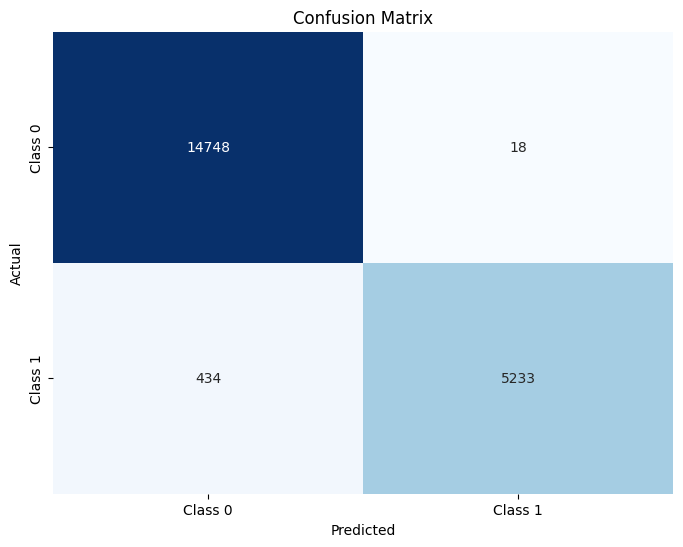

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Section 3 - Dataset 3

## Train

In [ ]:
df = pd.read_csv("/content/xss_normalized.csv")
#Count null values in each column
null_counts = df.isnull().sum()

# Print the results
print("Number of null values in each column:")
print(null_counts)

# # Count total null values in the DataFrame
# total_null_count = null_counts.sum()
# print("\nTotal number of null values:", total_null_count)


# df.isnull().values.any()

Number of null values in each column:
url_length                0
url_special_characters    0
url_tag_script            0
url_tag_iframe            0
url_attr_src              0
                         ..
js_min_define_function    0
js_min_function_calls     0
js_string_max_length      0
html_length               0
Class                     0
Length: 68, dtype: int64


In [ ]:
X = df.drop(df.columns[-1], axis=1)
y = df[df.columns[-1]]
y = y.astype(int)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (60600, 67)
X_val shape: (20200, 67)
X_test shape: (20200, 67)
y_train shape: (60600,)
y_val shape: (20200,)
y_test shape: (20200,)


In [ ]:
value_counts = y_val.value_counts()

print(value_counts)

Class
0    20003
1      197
Name: count, dtype: int64


Accuracy: 0.9988118811881188
Precision: 0.9481865284974094
Recall: 0.9289340101522843


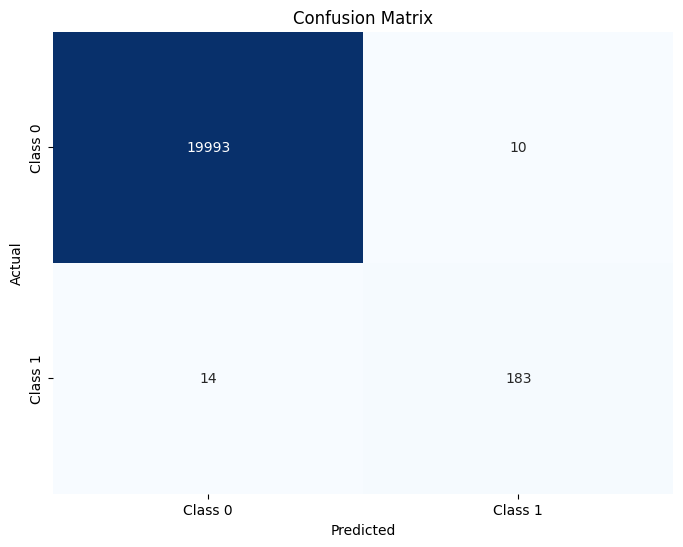

In [ ]:
classifier_linear = SVC(kernel='linear')
classifier_linear.fit(X_train, y_train)

y_pred_linear = classifier_linear.predict(X_val)

accuracy_linear = accuracy_score(y_val, y_pred_linear)
precision_linear = precision_score(y_val, y_pred_linear)
recall_linear = recall_score(y_val, y_pred_linear)

print("Accuracy:", accuracy_linear)
print("Precision:", precision_linear)
print("Recall:", recall_linear)

cm_linear = confusion_matrix(y_val, y_pred_linear)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy (Poly): 0.9991584158415842
Precision (Poly): 1.0
Recall (Poly): 0.9137055837563451


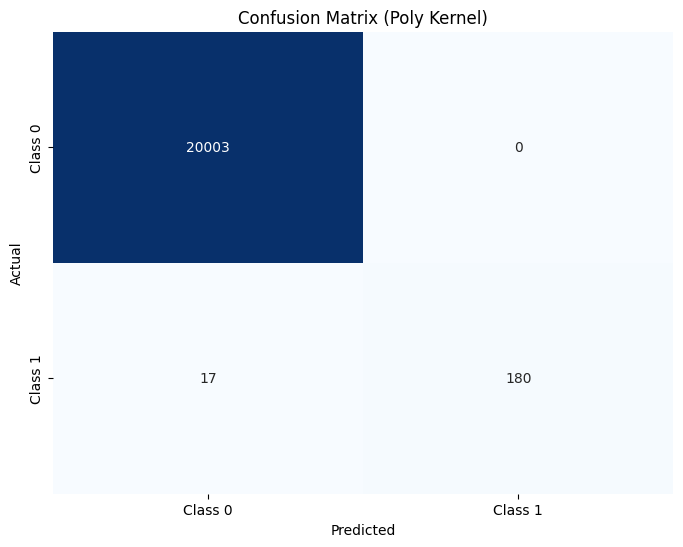

In [ ]:
classifier_poly = SVC(kernel='poly')
classifier_poly.fit(X_train, y_train)

y_pred_poly = classifier_poly.predict(X_val)

accuracy_poly = accuracy_score(y_val, y_pred_poly)
precision_poly = precision_score(y_val, y_pred_poly)
recall_poly = recall_score(y_val, y_pred_poly)

print("Accuracy (Poly):", accuracy_poly)
print("Precision (Poly):", precision_poly)
print("Recall (Poly):", recall_poly)

cm_poly = confusion_matrix(y_val, y_pred_poly)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_poly, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Poly Kernel)')
plt.show()

Accuracy (RBF): 0.9991584158415842
Precision (RBF): 1.0
Recall (RBF): 0.9137055837563451


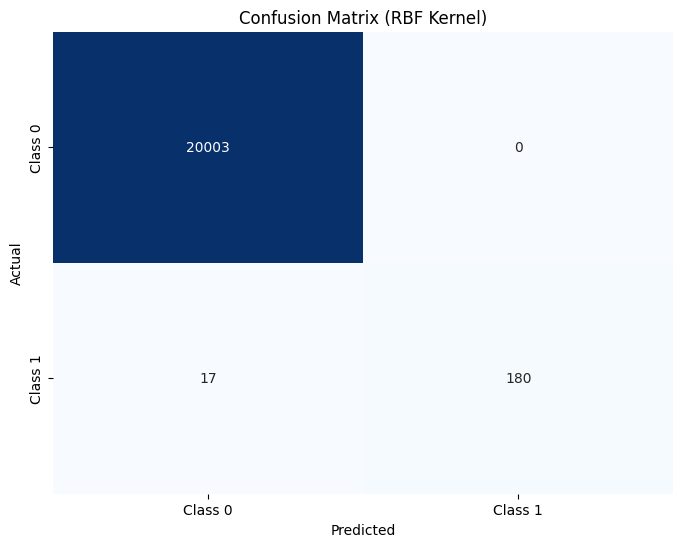

In [ ]:
classifier_rbf = SVC(kernel='rbf')
classifier_rbf.fit(X_train, y_train)

y_pred_rbf = classifier_rbf.predict(X_val)

accuracy_rbf = accuracy_score(y_val, y_pred_rbf)
precision_rbf = precision_score(y_val, y_pred_rbf)
recall_rbf = recall_score(y_val, y_pred_rbf)

print("Accuracy (RBF):", accuracy_rbf)
print("Precision (RBF):", precision_rbf)
print("Recall (RBF):", recall_rbf)

cm_rbf = confusion_matrix(y_val, y_pred_rbf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rbf, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (RBF Kernel)')
plt.show()

Accuracy (Sigmoid): 0.9978217821782178
Precision (Sigmoid): 0.9090909090909091
Recall (Sigmoid): 0.8629441624365483


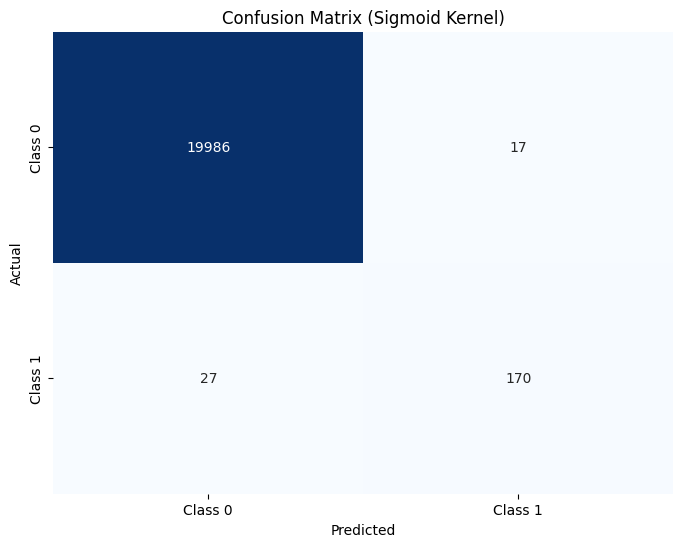

In [ ]:
classifier_sigmoid = SVC(kernel='sigmoid')
classifier_sigmoid.fit(X_train, y_train)

y_pred_sigmoid = classifier_sigmoid.predict(X_val)

accuracy_sigmoid = accuracy_score(y_val, y_pred_sigmoid)
precision_sigmoid = precision_score(y_val, y_pred_sigmoid)
recall_sigmoid = recall_score(y_val, y_pred_sigmoid)

print("Accuracy (Sigmoid):", accuracy_sigmoid)
print("Precision (Sigmoid):", precision_sigmoid)
print("Recall (Sigmoid):", recall_sigmoid)

cm_sigmoid = confusion_matrix(y_val, y_pred_sigmoid)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_sigmoid, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Sigmoid Kernel)')
plt.show()

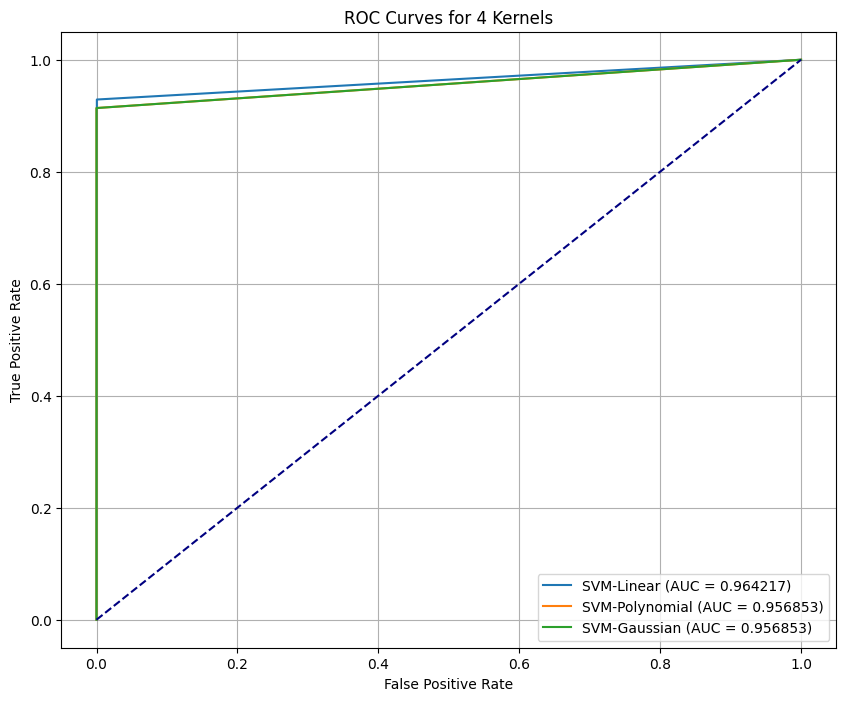

In [ ]:
models = {
    "SVM-Linear": y_pred_linear,
    "SVM-Polynomial": y_pred_poly,
    "SVM-Gaussian": y_pred_rbf,
    # "SVM-Sigmoid": y_pred_sig
}

plt.figure(figsize=(10, 8))

for model_name, y_pred in models.items():
    fpr, tpr, _ = roc_curve(y_val, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.6f})")

plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for 4 Kernels")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Test

In [ ]:
y_pred_test = classifier_linear.predict(X_test)

In [ ]:
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
cm_test = confusion_matrix(y_test, y_pred_test)

print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)

Accuracy: 0.9983168316831683
Precision: 0.9215686274509803
Recall: 0.912621359223301


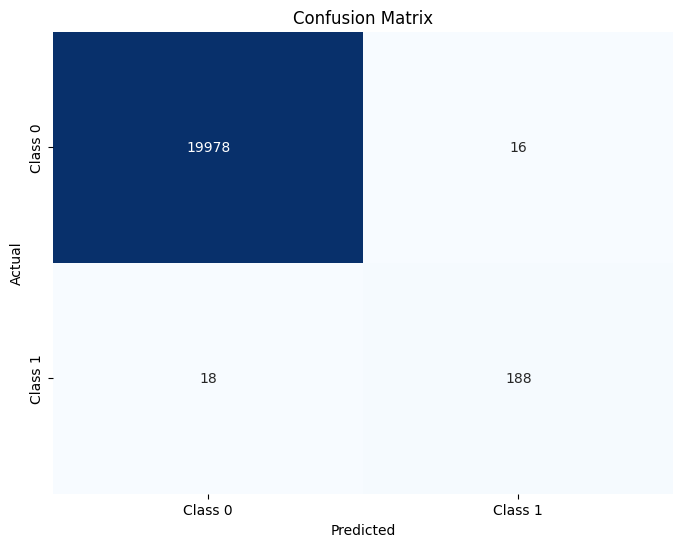

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.9983168316831683
Precision: 0.9215686274509803
Recall: 0.912621359223301


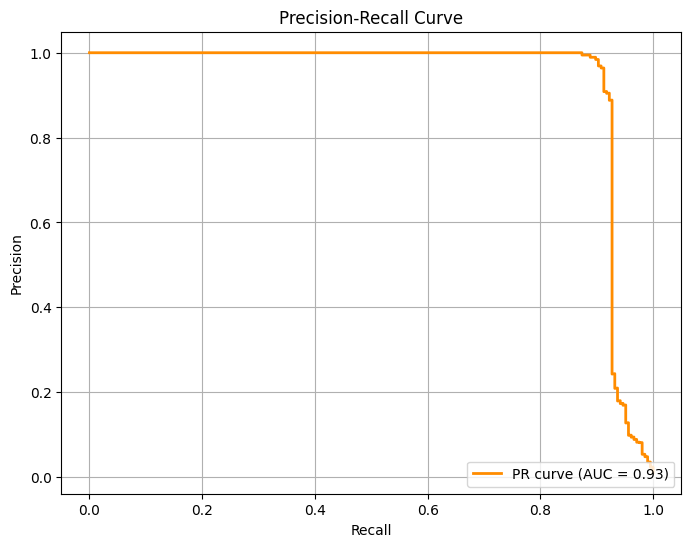

In [ ]:
#gadha
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)

# --- PR Curve Plotting ---
# Assuming 'classifier_poly' is your best performing model
y_pred_proba = classifier_poly.decision_function(X_test)
# Get probabilities for PR curve (for SVM, use decision_function)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
# --- End of PR Curve Plotting ---

Accuracy: 0.9983168316831683
Precision: 0.9215686274509803
Recall: 0.912621359223301


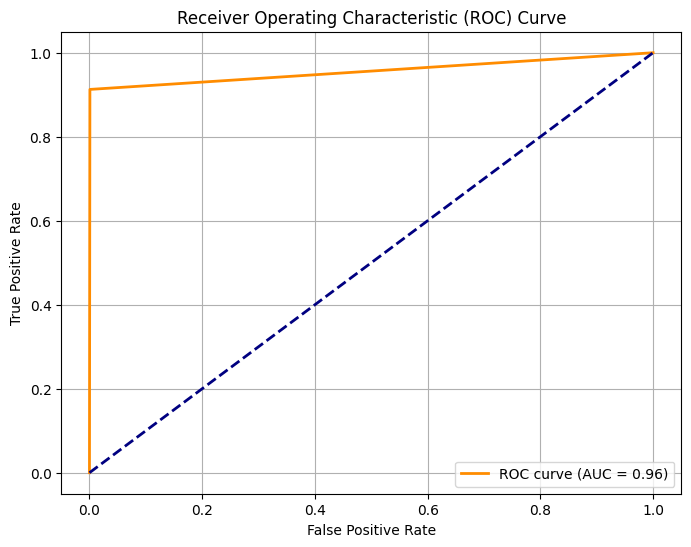

In [ ]:
from sklearn.metrics import roc_curve, auc

# Assuming you have already trained your model and have y_test and y_pred_test

# Print accuracy, precision, and recall
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()